In [24]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [6]:
crime = pd.read_csv('crime_data (1).csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [8]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    print(x)
    return x

In [9]:
crime.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [10]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [11]:
def_norm = norm_func(crime.iloc[:,1:])

      Murder   Assault  UrbanPop      Rape
0   0.746988  0.654110  0.440678  0.359173
1   0.554217  0.746575  0.271186  0.961240
2   0.439759  0.852740  0.813559  0.612403
3   0.481928  0.496575  0.305085  0.315245
4   0.493976  0.791096  1.000000  0.860465
5   0.427711  0.544521  0.779661  0.811370
6   0.150602  0.222603  0.762712  0.098191
7   0.307229  0.660959  0.677966  0.219638
8   0.879518  0.993151  0.813559  0.635659
9   1.000000  0.568493  0.474576  0.478036
10  0.271084  0.003425  0.864407  0.333333
11  0.108434  0.256849  0.372881  0.178295
12  0.578313  0.698630  0.864407  0.431525
13  0.385542  0.232877  0.559322  0.354005
14  0.084337  0.037671  0.423729  0.103359
15  0.313253  0.239726  0.576271  0.276486
16  0.536145  0.219178  0.338983  0.232558
17  0.879518  0.698630  0.576271  0.385013
18  0.078313  0.130137  0.322034  0.012920
19  0.632530  0.873288  0.593220  0.529716
20  0.216867  0.356164  0.898305  0.232558
21  0.680723  0.719178  0.711864  0.718346
22  0.11445

In [13]:
def_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


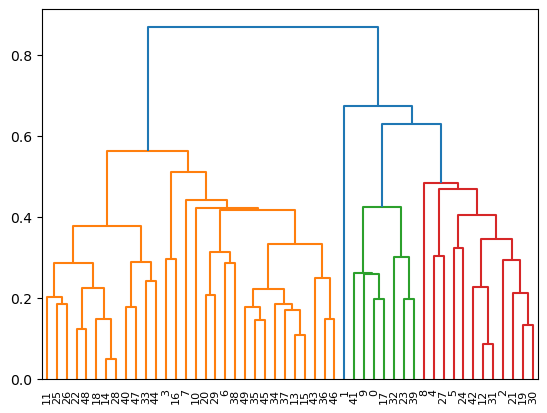

In [15]:
dendogram = sch.dendrogram(sch.linkage(def_norm,method ='average' ))

In [17]:
hc = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='complete',distance_threshold=None)

In [18]:
y_hc = hc.fit_predict(def_norm)

In [19]:
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [20]:
set(y_hc)

{0, 1, 2}

In [21]:
crime['h_clusteroid'] = y_hc

In [22]:
crime


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusteroid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [23]:
crime1=crime.sort_values("h_clusteroid")
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusteroid
0,Alabama,13.2,236,58,21.2,0
42,Texas,12.7,201,80,25.5,0
41,Tennessee,13.2,188,59,26.9,0
39,South Carolina,14.4,279,48,22.5,0
32,North Carolina,13.0,337,45,16.1,0
31,New York,11.1,254,86,26.1,0
30,New Mexico,11.4,285,70,32.1,0
27,Nevada,12.2,252,81,46.0,0
23,Mississippi,16.1,259,44,17.1,0
21,Michigan,12.1,255,74,35.1,0


In [24]:
crime1.groupby("h_clusteroid").mean()

C:\Users\KSURENDERREDDY\AppData\Local\Temp\ipykernel_27684\3204230573.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime1.groupby("h_clusteroid").mean()


,Murder,Assault,UrbanPop,Rape
h_clusteroid,,,,
0,12.165,255.25,68.4,29.165
1,5.715,132.30,70.8,18.100
2,3.180,78.70,49.3,11.630


# K-Means Clustering


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [28]:
crime = pd.read_csv("crime_data (1).csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [29]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [30]:
crime1 = crime.iloc[:,1:]

In [31]:
crime1.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [34]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaled_crime_df = pd.DataFrame(Scaler.fit_transform(crime.iloc[:,1:]),columns=['Murder','Assault','UrbanPop','Rape'])
Scaled_crime_df

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


[200.0, 104.96163315756871, 80.08569526137276, 57.55425863091104, 50.05119672966492, 44.0921281550805, 40.675884795041114, 36.073709589324494, 31.61233134617762]


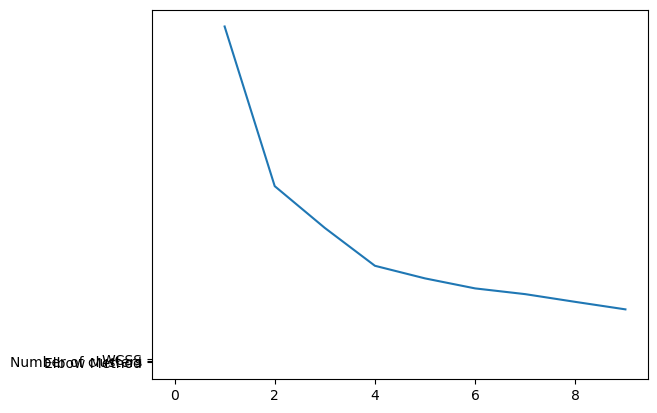

In [36]:
wcss = []
for i in range(1,10):
    
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(Scaled_crime_df)
    wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1,10), wcss)
plt.plot('Elbow Method')
plt.plot('Number of clusters')
plt.plot('WCSS')
plt.show()

In [38]:
from sklearn.cluster import KMeans
cluster_new = KMeans(3, random_state =42)
cluster_new.fit(Scaled_crime_df)

KMeans(n_clusters=3, random_state=42)

In [40]:
cluster_new.labels_

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [41]:
set(cluster_new.labels_)

{0, 1, 2}

In [42]:
crime['clusterid_new']= cluster_new.labels_

In [43]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [45]:
crime.sort_values(by='clusterid_new')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
49,Wyoming,6.8,161,60,15.6,0
20,Massachusetts,4.4,149,85,16.3,0
34,Ohio,7.3,120,75,21.4,0
15,Kansas,6.0,115,66,18.0,0
35,Oklahoma,6.6,151,68,20.0,0
13,Indiana,7.2,113,65,21.0,0
36,Oregon,4.9,159,67,29.3,0
29,New Jersey,7.4,159,89,18.8,0
10,Hawaii,5.3,46,83,20.2,0
37,Pennsylvania,6.3,106,72,14.9,0


In [46]:
crime.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875,73.875000,18.78125
1,1,12.165000,255.250,68.400000,29.16500
2,2,3.971429,86.500,51.928571,12.70000


In [47]:
crime[crime['clusterid_new']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1
12,Illinois,10.4,249,83,24.0,1
17,Louisiana,15.4,249,66,22.2,1
19,Maryland,11.3,300,67,27.8,1


In [50]:
crime[crime['clusterid_new']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [2]:
from sklearn.metrics import silhouette_score
score = silhouette_score(Scaled_crime_df, cluster_new.labels_,metric='euclidean')
score

NameError: name 'Scaled_crime_df' is not defined

In [54]:
crime1 = pd.DataFrame()
crime1['custer_id']=cluster_new.labels_

In [56]:
crime1


,custer_id
0,1
1,1
2,1
3,2
4,1
5,1
6,0
7,0
8,1
9,1


# DBSCAN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("crime_data (1).csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [8]:
array=df.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [11]:
stscaler = StandardScaler()
X = stscaler.fit_transform(array)

In [12]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

[[0.         0.78006247 0.84928467 0.92509451 1.14292205 1.29621831
  1.30273924 1.30290503 1.50105972 1.61563499 1.62065461]
 [0.         2.07898369 2.13697134 2.30088403 2.35013877 2.35997304
  2.36811895 2.56180471 2.59008583 2.72647204 2.72806129]
 [0.         1.0482199  1.08341076 1.09354181 1.20621365 1.22403776
  1.32378897 1.37888923 1.61207525 1.66155692 1.76715363]
 [0.         1.0013278  1.00722663 1.07057017 1.24148411 1.30290503
  1.436899   1.43992053 1.45972128 1.58779931 1.68872255]
 [0.         1.20897691 1.30069114 1.32378897 1.53005165 1.6957501
  1.81930503 1.93115604 2.04556279 2.19184473 2.2539111 ]
 [0.         1.24886253 1.30069114 1.32606825 1.37888923 1.41306145
  1.54876384 1.56244725 1.75396679 1.80796295 1.80800357]
 [0.         0.88100359 0.95643249 0.99437327 1.04597225 1.08653166
  1.22399673 1.24051012 1.29561222 1.39838355 1.45903108]
 [0.         1.19227586 1.27140067 1.42312615 1.45285466 1.56683387
  1.57429436 1.59692174 1.59993165 1.60562231 1.639

AttributeError: module 'matplotlib.pyplot' has no attribute 'Xlabel'

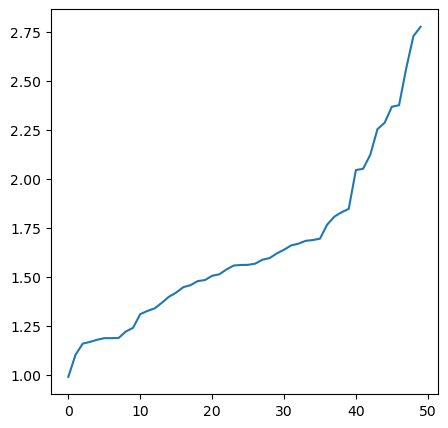

In [14]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)

distances, indices = neighbors.kneighbors(X)
print(distances)

distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5,5))
plt.plot(distances)
plt.Xlabel("Points")
plt.Ylabel("Distance")
plt.grid()

In [16]:
from kneed import KneeLocator

i=np.arange(len(distance))
knee= KneeLocator(i,distances, S=1, curve='convex',direction='increasing',interp_method='polynomial')

fig = plt.figure(figsize=(5,5))
knee.plot_knee()
plt.Xlabel("points")
plt.Ylabel("Distance")
plt.grid()

print(distance[knee.knee])

ModuleNotFoundError: No module named 'kneed'

In [19]:
dbscan = DBSCAN(eps=1.5, min_samples=3)
clusters =dbscan.fit_predict(X)

In [20]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [21]:
set(clusters)

{-1, 0}

In [22]:
df['cluster']=dbscan.labels_
df.head(50)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [23]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, dbscan.labels_ , metric='euclidean')
score

0.23455598753159795